# Repte #4 - Models de classificació

In [499]:
#!pip install sklearn

In [500]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from pprint import pprint

# Preprocesado y análisis
# ==============================================================================
#import statsmodels.api as sm
#import pingouin as pg
from scipy import stats
import random as rd
from imblearn.over_sampling import SMOTE

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import VarianceThreshold


# Test Estadísticos
# ==============================================================================
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF


# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### 1. DataFrame

In [501]:
data_original= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Reto072022\train.csv",header=0)

In [502]:
X = data_original
X.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,11.69,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
1,0,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
2,0,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,...,13.01,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097


In [503]:
y=data_original["diagnosis"]
y.head(3)

0    0
1    0
2    0
Name: diagnosis, dtype: int64

In [504]:
data_original_test= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Reto072022\test.csv",header=0)

In [505]:
data_test=data_original_test
data_test.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.0626,0.08216,0.2136,0.06710
1,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
2,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.1848,0.13350,0.3227,0.09326


#### Análisis Exploratorio

##### Check null values

In [506]:
X.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [507]:
print('The dataset has', X_train.shape[0], 'rows and', X_train.shape[1], 'columns.')

The dataset has 364 rows and 30 columns.


In [508]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

In [509]:
X.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
diagnosis,455.0,0.37,0.48,0.00,0.00,0.00,1.00,1.00
radius_mean,455.0,14.14,3.63,6.98,11.70,13.30,15.74,28.11
texture_mean,455.0,19.31,4.27,9.71,16.21,18.89,21.80,39.28
perimeter_mean,455.0,92.09,25.00,43.79,75.02,85.98,103.65,188.50
area_mean,455.0,657.83,363.54,143.50,419.25,546.40,777.25,2501.00
smoothness_mean,455.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,455.0,0.11,0.05,0.02,0.07,0.09,0.13,0.35
concavity_mean,455.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,455.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,455.0,0.18,0.03,0.12,0.16,0.18,0.20,0.30


#### Matriz de Correlaciones

<AxesSubplot:>

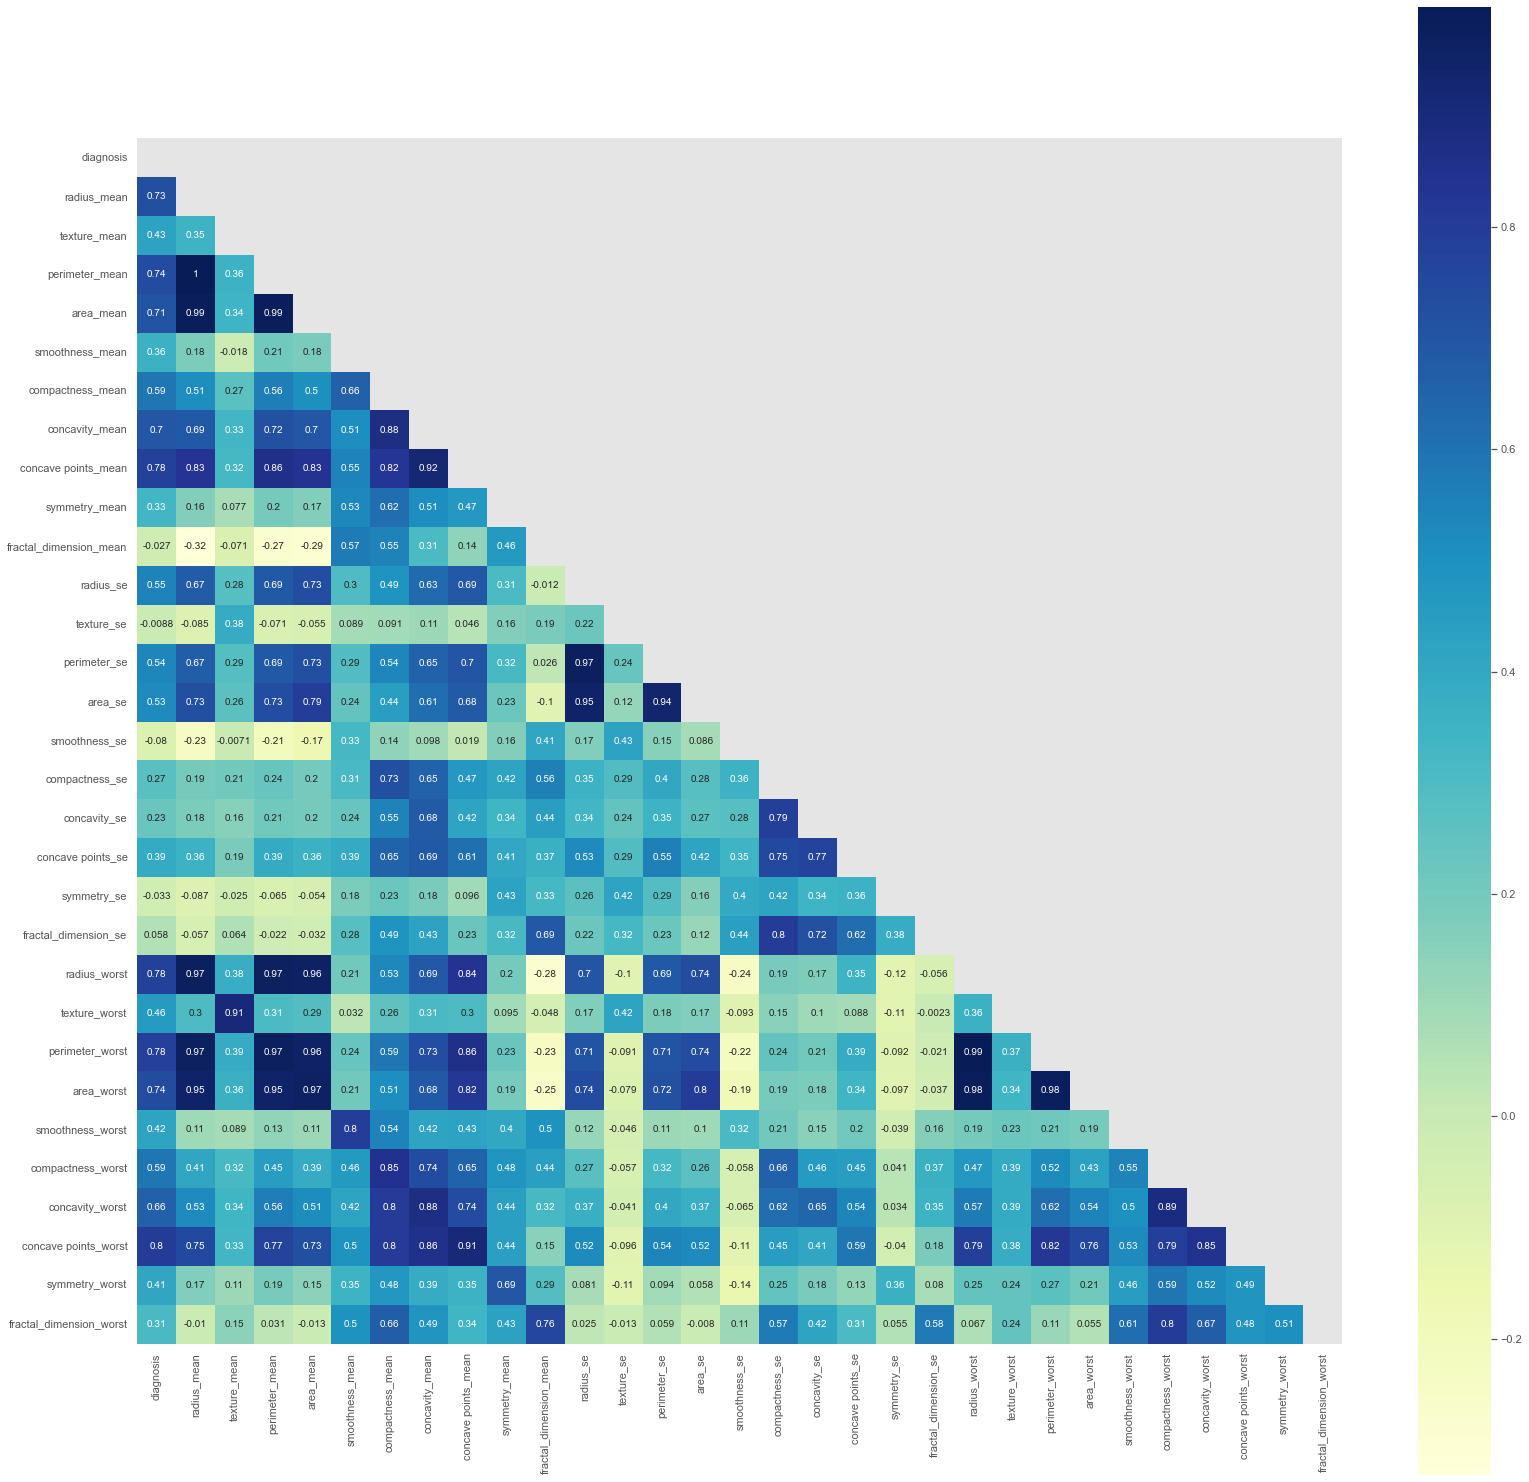

In [510]:
plt.figure(figsize=(27,27))
corr = X.corr()
upp_mat = np.triu(corr)
sns.heatmap(corr,cmap="YlGnBu", square = True,annot=True,mask = upp_mat)

* Entre la variable objetivo y las variables explicativas, existe una correlación que supera el (+-) 0,4 con la mayoría de variables.
* También se producen correlaciones elevadas entre las variables explitativas, superiores en varios casos al (+-) 0,5 por lo que pueden darse problemas de multicolinealidad.

#### 2. Preprocesado de la información

In [511]:
features = X.columns.values
features

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

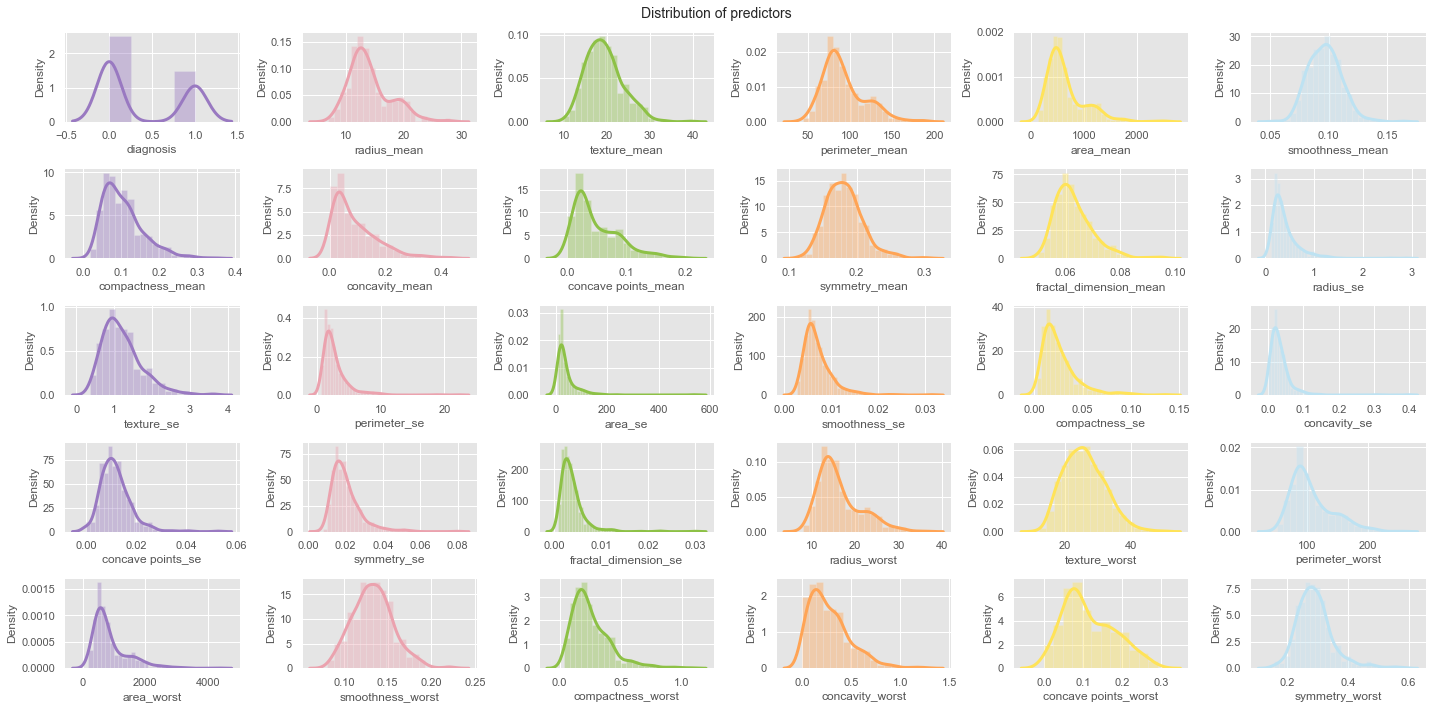

In [512]:
# we will plot the distribution of all the predictors: 


colors =["#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2',"#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2',
        "#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2',"#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2',
        "#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2',"#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2'
        ]

f, axes = plt.subplots(5,6, figsize = (20, 10))
f.suptitle('Distribution of predictors', fontsize = 14 )

for i, ax in enumerate(axes.flatten()): 
    sns.distplot(X[features].iloc[: , i], color = colors[i], ax = ax, kde_kws=dict(linewidth=3))
plt.tight_layout(); 

In [513]:
# import library for test
from scipy.stats import shapiro

# create a function that checks if the distribution is normal: 
def check_normal_distribution(data): 
    
    for i in data[features]: 
        stat, p_value_norm = shapiro(X[i])
        print(f'Results for {i}:')
        print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
        if p_value_norm < 0.05 : 
            print("Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed")
            print('----------------------------------------------------------------------------------------------')
        else: 
            print("Fail to reject null hypothesis at 95€ Significance Level  >> The data is normally distributed")
            print('----------------------------------------------------------------------------------------------')

In [514]:
check_normal_distribution(X[features])

Results for diagnosis:
stat=0.613, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for radius_mean:
stat=0.938, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for texture_mean:
stat=0.974, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for perimeter_mean:
stat=0.933, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for area_mean:
stat=0.852, p=0.000
Reject null hypothesis at 95% Signi

* Ninguna variable se distribuye normalmente

<Figure size 576x360 with 0 Axes>

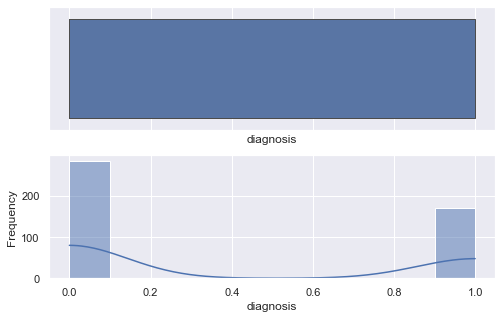

<Figure size 576x360 with 0 Axes>

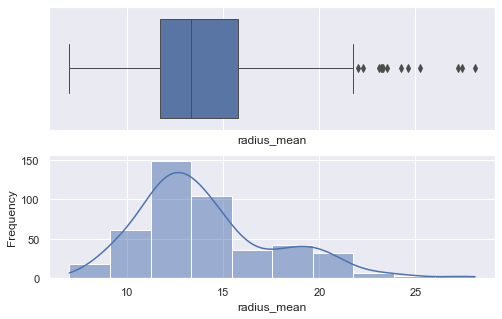

<Figure size 576x360 with 0 Axes>

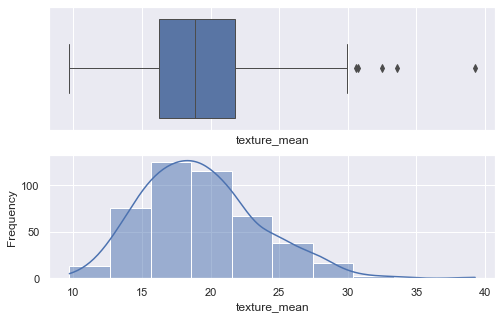

<Figure size 576x360 with 0 Axes>

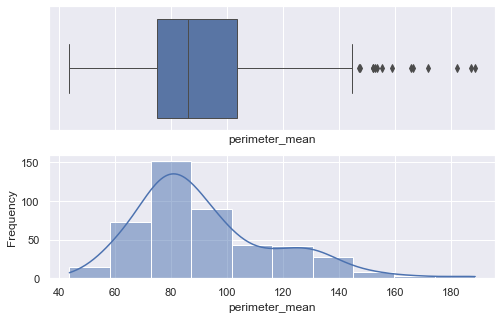

<Figure size 576x360 with 0 Axes>

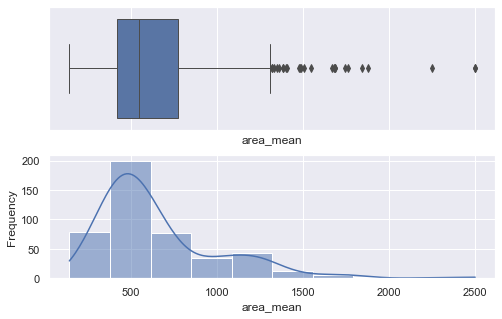

<Figure size 576x360 with 0 Axes>

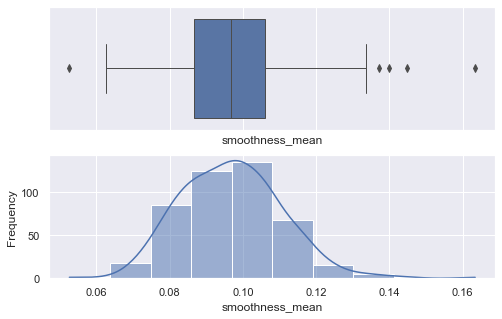

<Figure size 576x360 with 0 Axes>

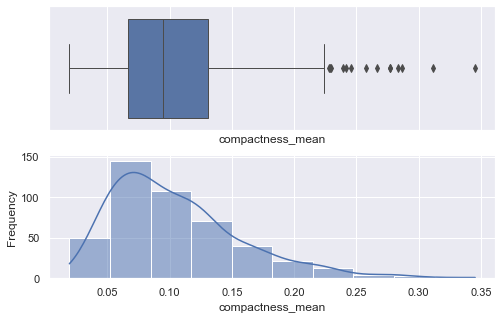

<Figure size 576x360 with 0 Axes>

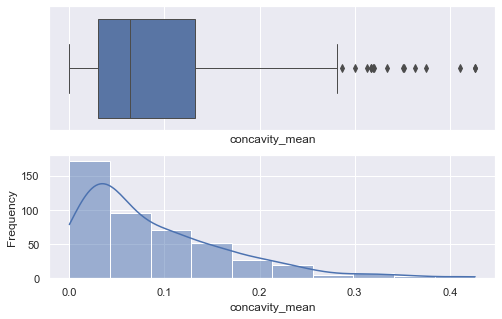

<Figure size 576x360 with 0 Axes>

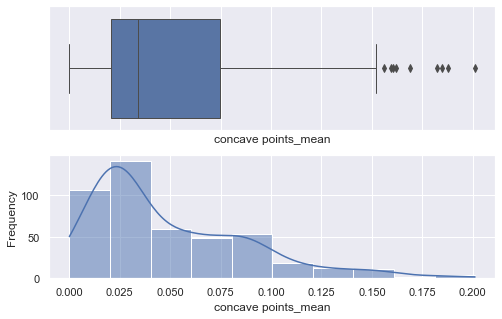

<Figure size 576x360 with 0 Axes>

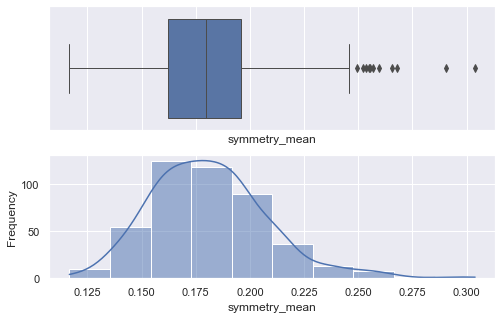

<Figure size 576x360 with 0 Axes>

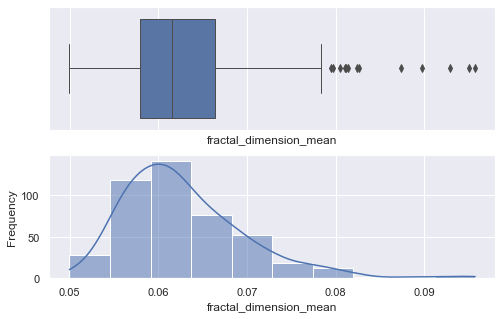

<Figure size 576x360 with 0 Axes>

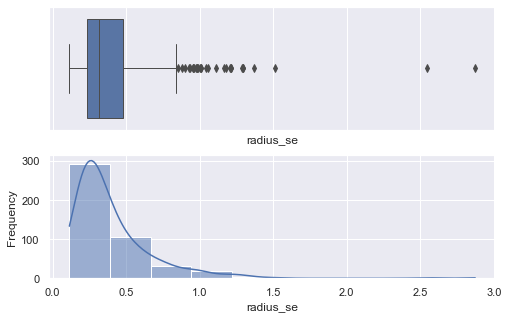

<Figure size 576x360 with 0 Axes>

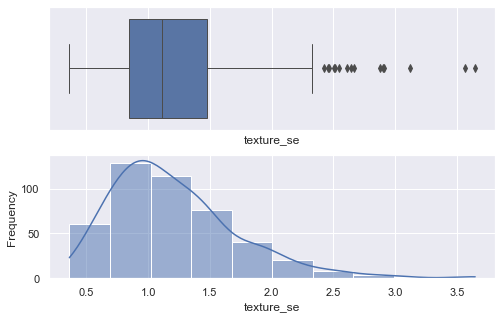

<Figure size 576x360 with 0 Axes>

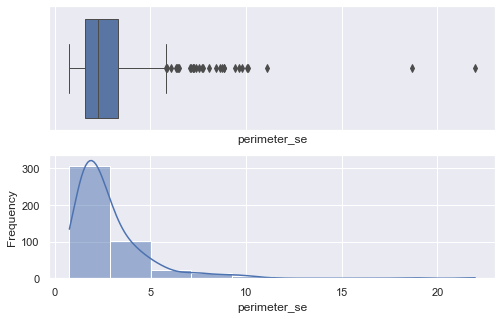

<Figure size 576x360 with 0 Axes>

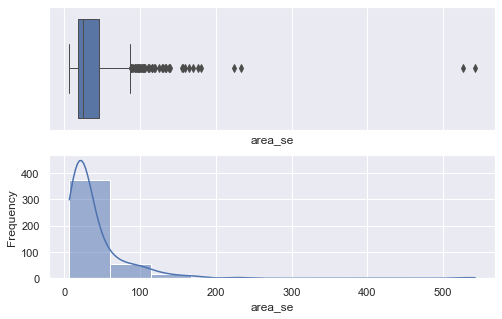

<Figure size 576x360 with 0 Axes>

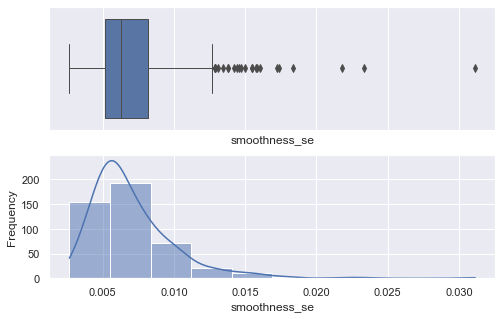

<Figure size 576x360 with 0 Axes>

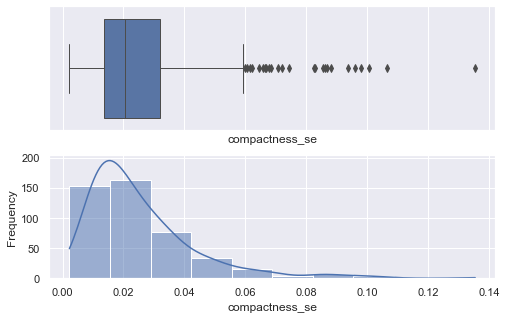

<Figure size 576x360 with 0 Axes>

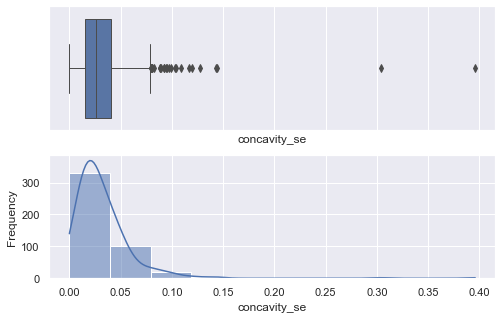

<Figure size 576x360 with 0 Axes>

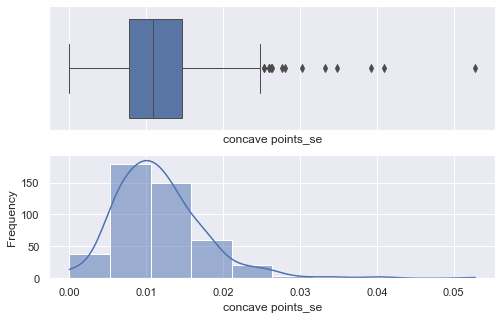

<Figure size 576x360 with 0 Axes>

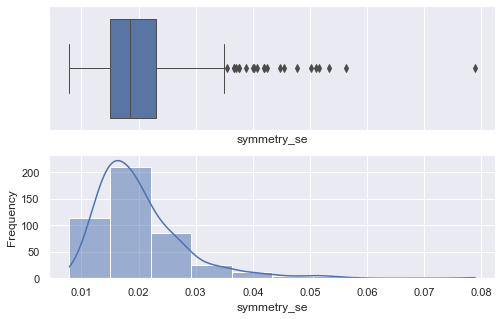

<Figure size 576x360 with 0 Axes>

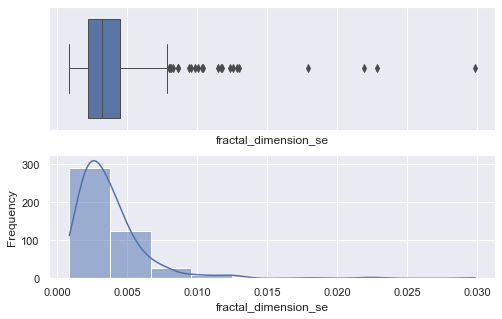

<Figure size 576x360 with 0 Axes>

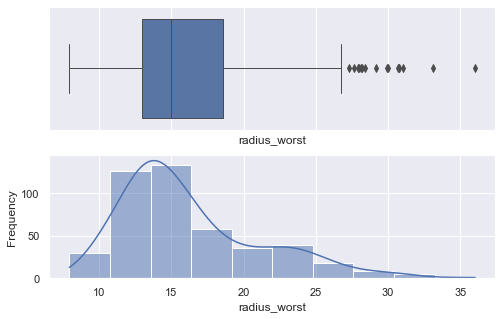

<Figure size 576x360 with 0 Axes>

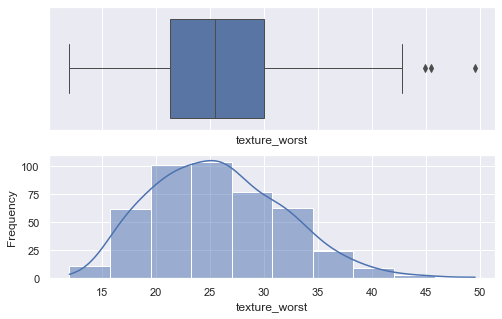

<Figure size 576x360 with 0 Axes>

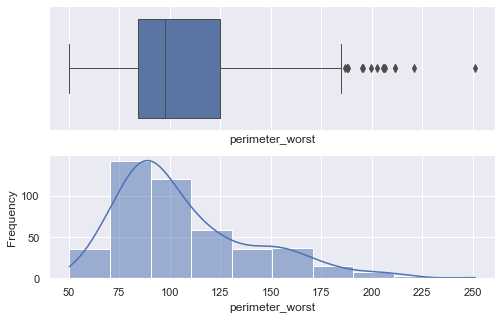

<Figure size 576x360 with 0 Axes>

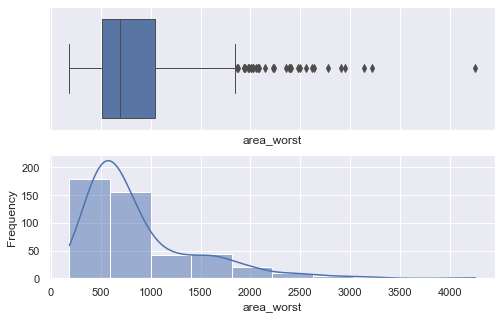

<Figure size 576x360 with 0 Axes>

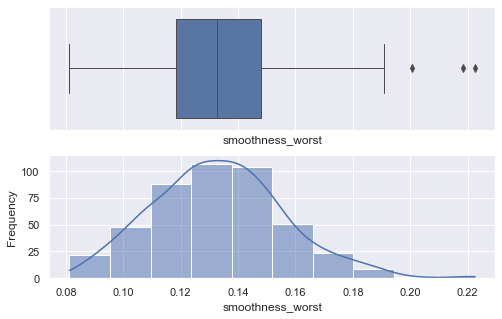

<Figure size 576x360 with 0 Axes>

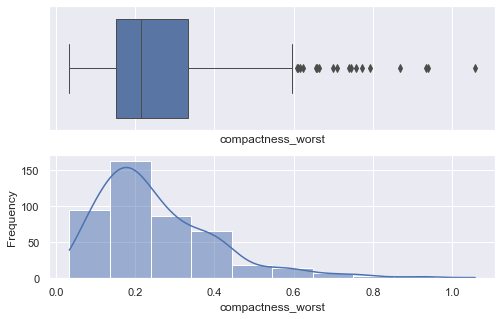

<Figure size 576x360 with 0 Axes>

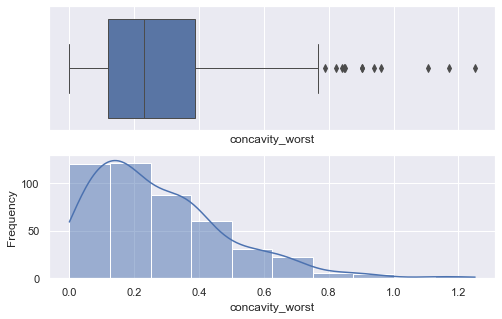

<Figure size 576x360 with 0 Axes>

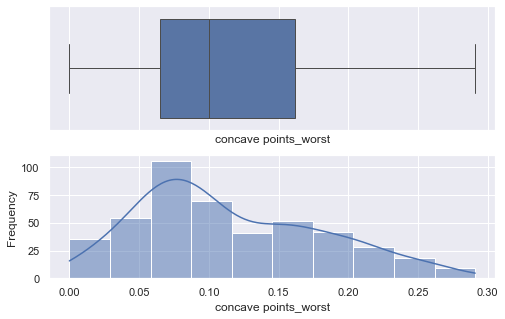

<Figure size 576x360 with 0 Axes>

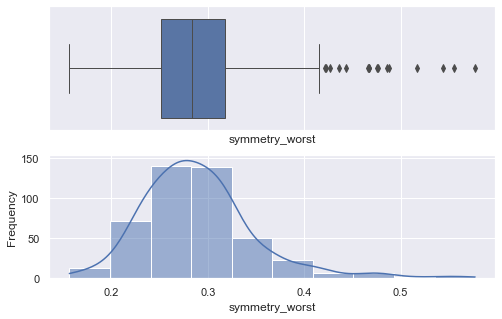

<Figure size 576x360 with 0 Axes>

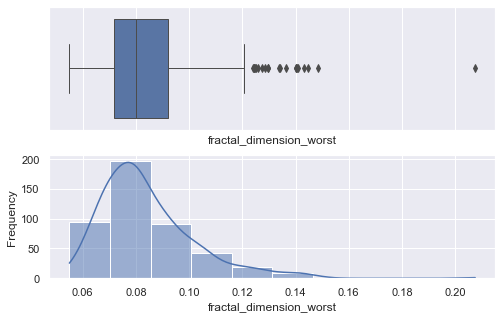

In [516]:
for i in X.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(data[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(data[i], ax=ax_hist , bins = 10,kde=True)

#### RobustScaler

* Ninguna variable expicativa sigue una distribución normal, se aplica RobustScaler, para solucionar los outlaiers que apararcen en muchas de las variables.

In [517]:
from sklearn.preprocessing import RobustScaler
df=X
normColumns = features
scalerNorm = preprocessing.RobustScaler().fit(df[normColumns])# RobustEscaler
df[normColumns] = scalerNorm.transform(df[normColumns])
X=df

<Figure size 576x360 with 0 Axes>

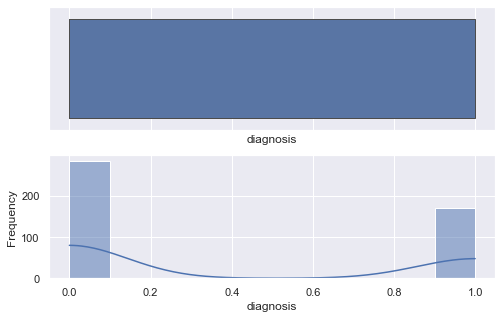

<Figure size 576x360 with 0 Axes>

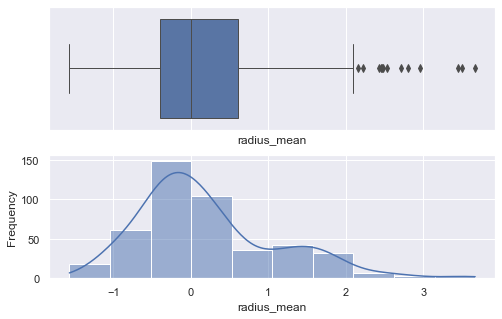

<Figure size 576x360 with 0 Axes>

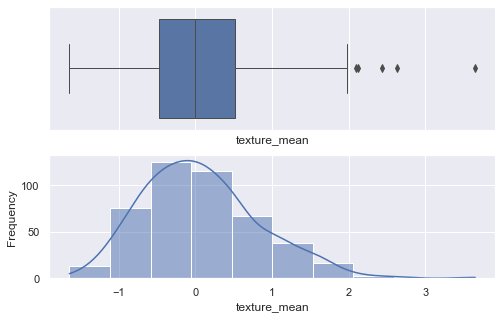

<Figure size 576x360 with 0 Axes>

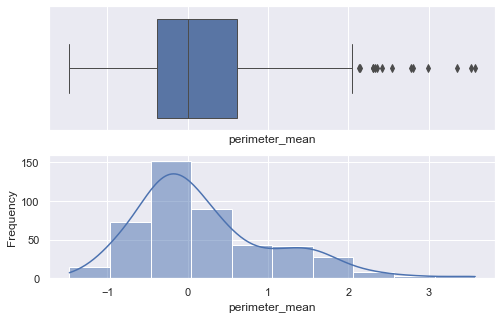

<Figure size 576x360 with 0 Axes>

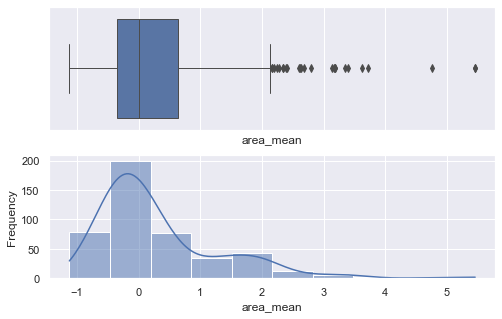

<Figure size 576x360 with 0 Axes>

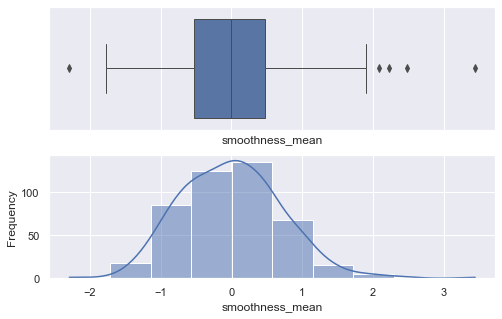

<Figure size 576x360 with 0 Axes>

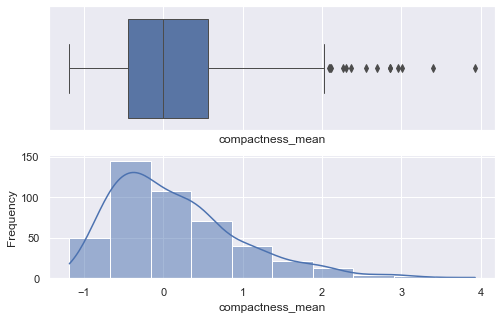

<Figure size 576x360 with 0 Axes>

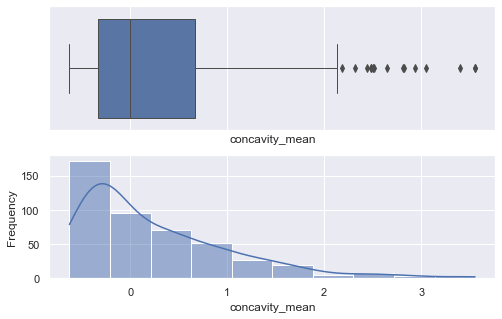

<Figure size 576x360 with 0 Axes>

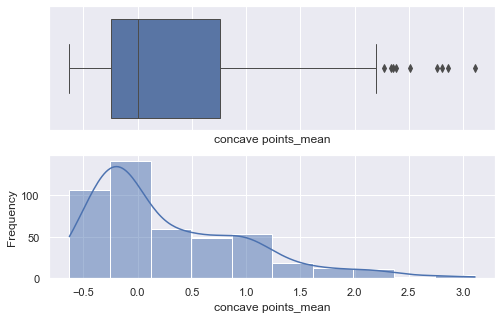

<Figure size 576x360 with 0 Axes>

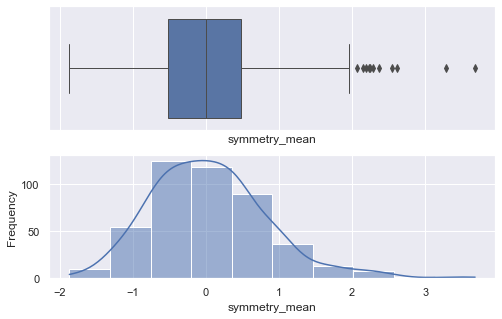

<Figure size 576x360 with 0 Axes>

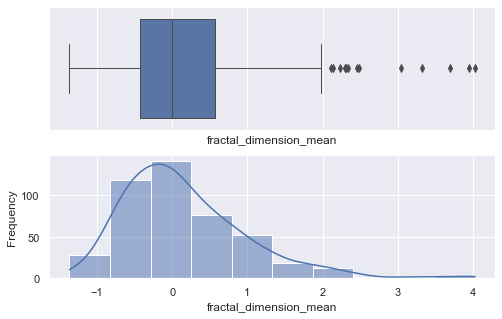

<Figure size 576x360 with 0 Axes>

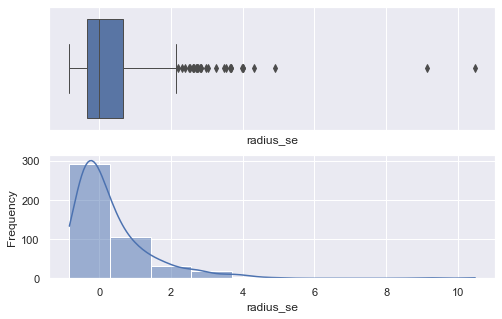

<Figure size 576x360 with 0 Axes>

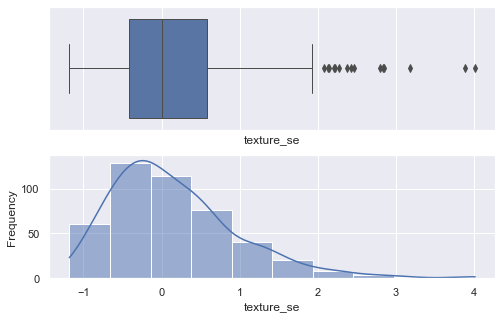

<Figure size 576x360 with 0 Axes>

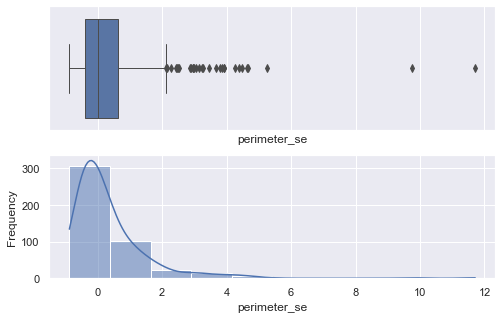

<Figure size 576x360 with 0 Axes>

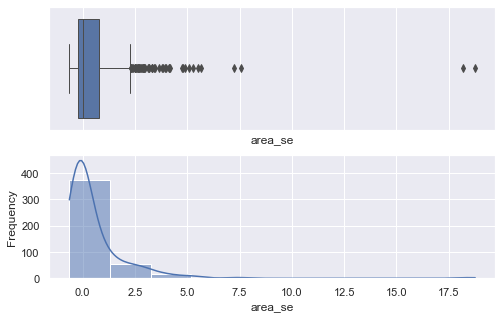

<Figure size 576x360 with 0 Axes>

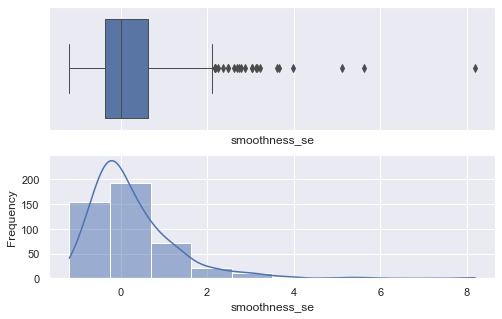

<Figure size 576x360 with 0 Axes>

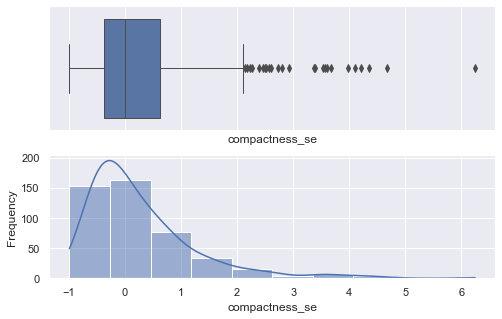

<Figure size 576x360 with 0 Axes>

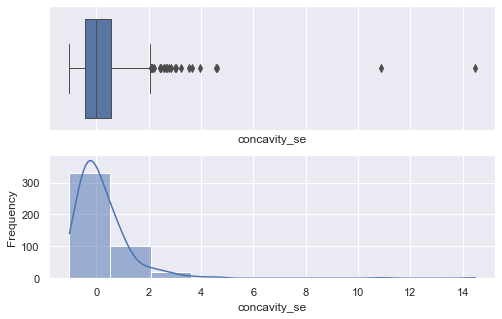

<Figure size 576x360 with 0 Axes>

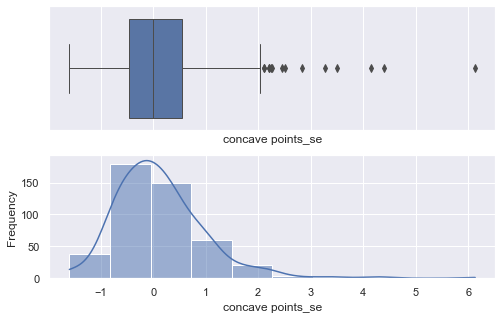

<Figure size 576x360 with 0 Axes>

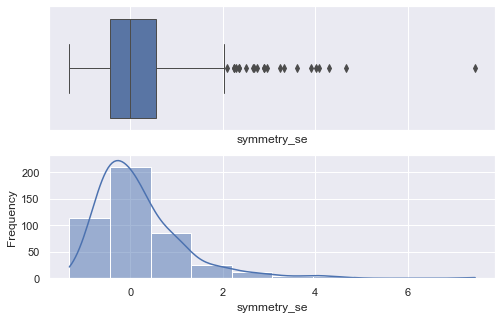

<Figure size 576x360 with 0 Axes>

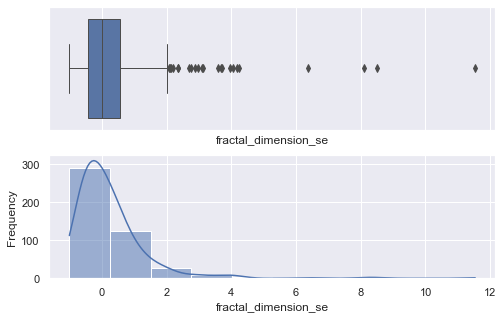

<Figure size 576x360 with 0 Axes>

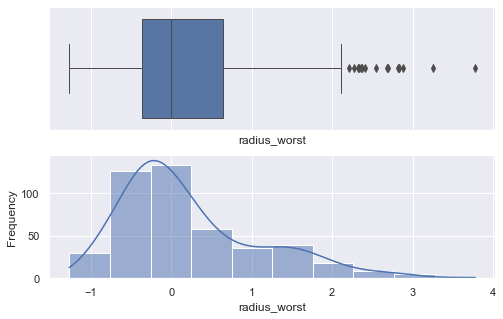

<Figure size 576x360 with 0 Axes>

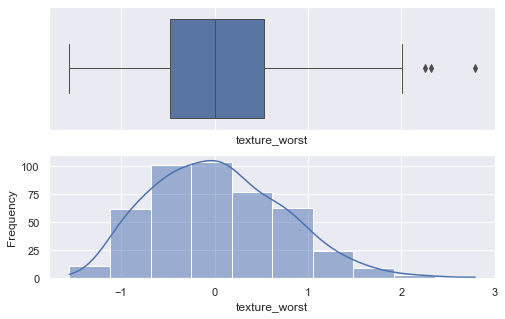

<Figure size 576x360 with 0 Axes>

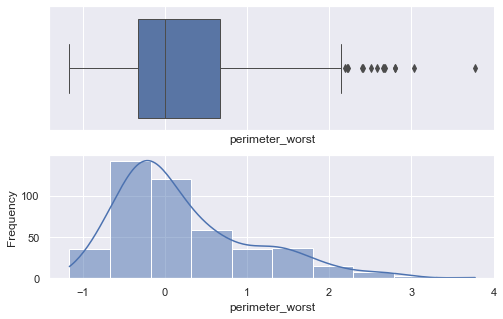

<Figure size 576x360 with 0 Axes>

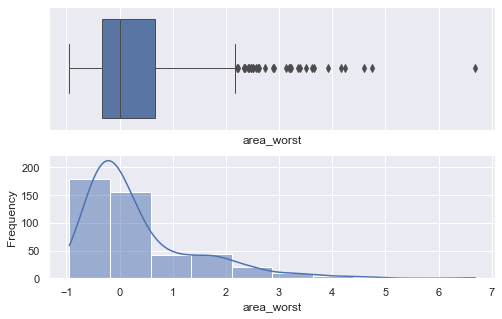

<Figure size 576x360 with 0 Axes>

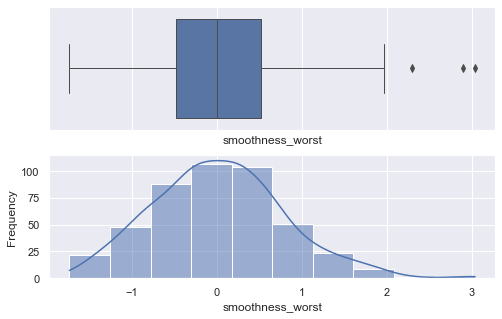

<Figure size 576x360 with 0 Axes>

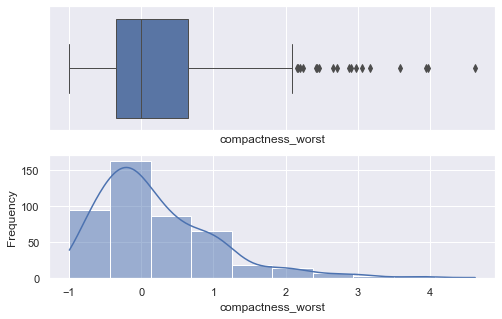

<Figure size 576x360 with 0 Axes>

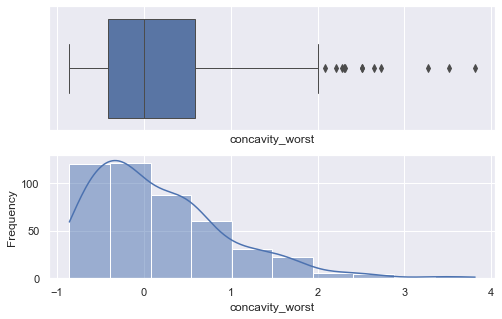

<Figure size 576x360 with 0 Axes>

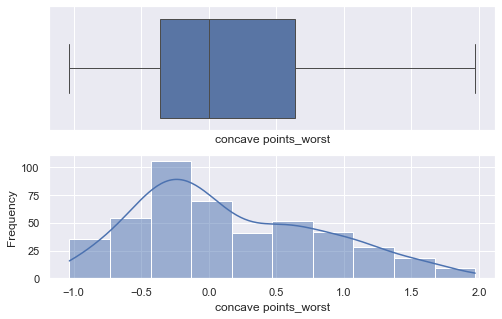

<Figure size 576x360 with 0 Axes>

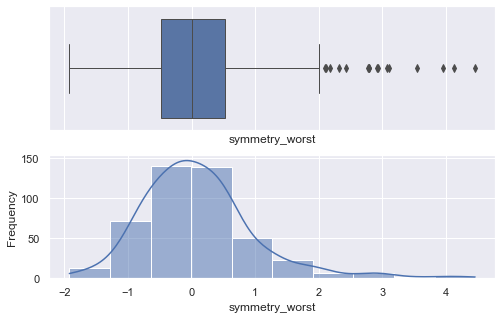

<Figure size 576x360 with 0 Axes>

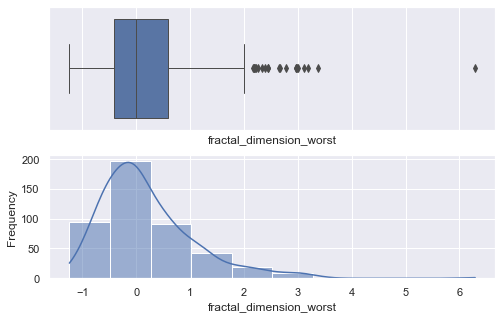

In [518]:
for i in X.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

* Las estadísticas de centrado y escalamiento de RobustScaler se basan en percentiles y no están influenciadas por unos pocos valores atípicos marginales muy grandes.
* El rango resultante de los valores de las características transformadas es mayor que para la estandarización o normalización y son aproximadamente similares. La mayoría de los valores transformados se encuentran en un rango [-3, 3].
* Los valores atípicos todavía están presentes en los datos transformados. Si se desearamos un recorte de valores atípicos por separado, se debería aplicar una transformación no lineal.

In [519]:
features_test=np.delete(features,0)
features_test

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [520]:
from sklearn.preprocessing import RobustScaler
df=X_test
normColumns = features_test
scalerNorm = preprocessing.RobustScaler().fit(df[normColumns])# RobustEscaler
df[normColumns] = scalerNorm.transform(df[normColumns])
df_test=df

<Figure size 576x360 with 0 Axes>

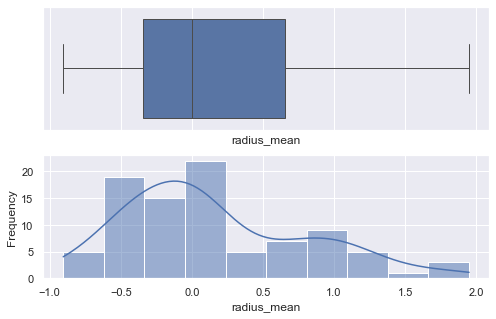

<Figure size 576x360 with 0 Axes>

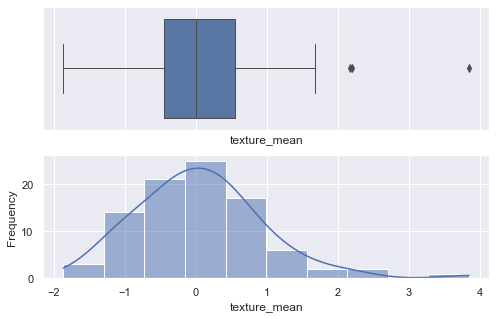

<Figure size 576x360 with 0 Axes>

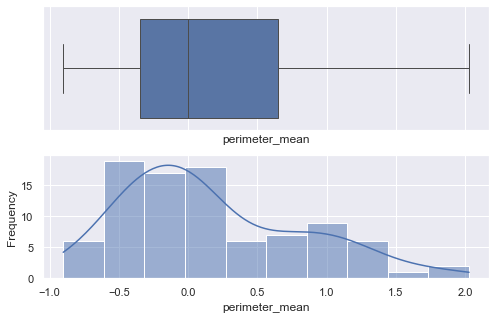

<Figure size 576x360 with 0 Axes>

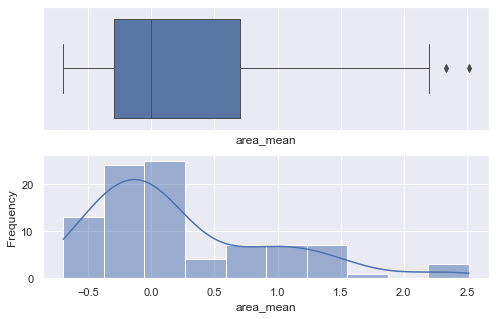

<Figure size 576x360 with 0 Axes>

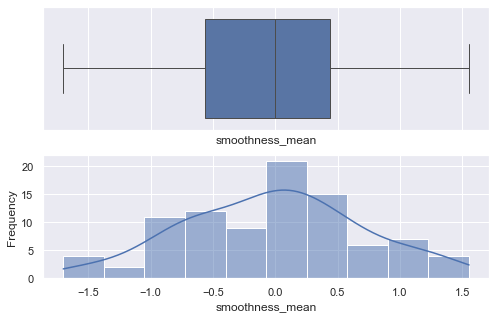

<Figure size 576x360 with 0 Axes>

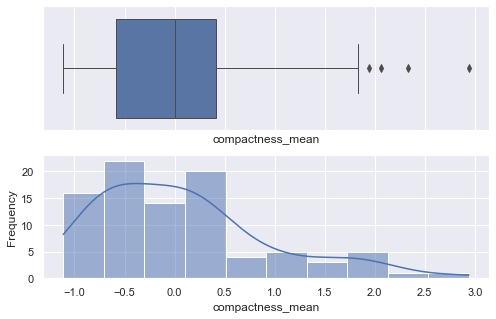

<Figure size 576x360 with 0 Axes>

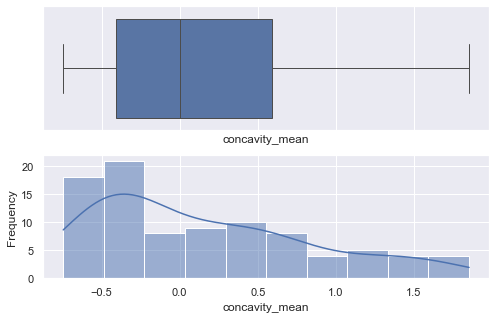

<Figure size 576x360 with 0 Axes>

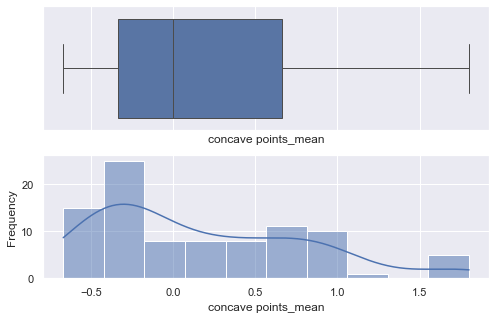

<Figure size 576x360 with 0 Axes>

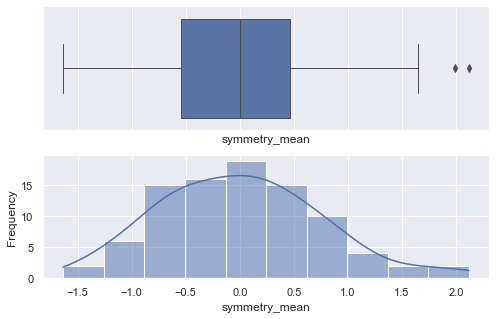

<Figure size 576x360 with 0 Axes>

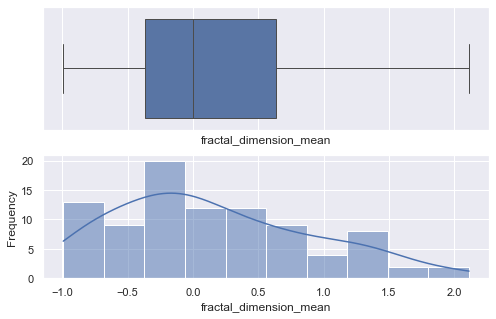

<Figure size 576x360 with 0 Axes>

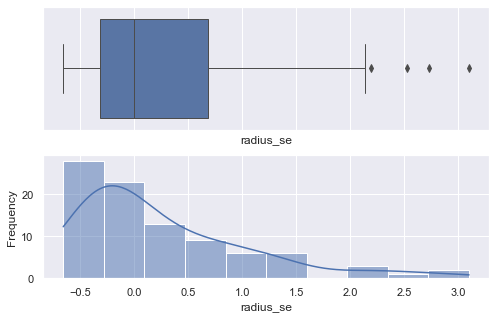

<Figure size 576x360 with 0 Axes>

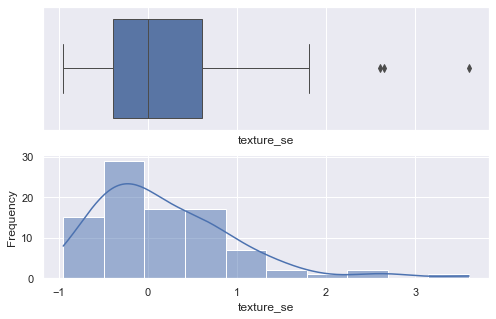

<Figure size 576x360 with 0 Axes>

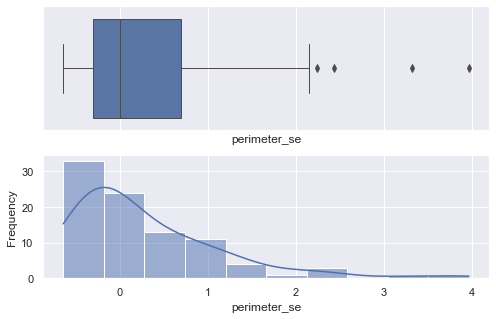

<Figure size 576x360 with 0 Axes>

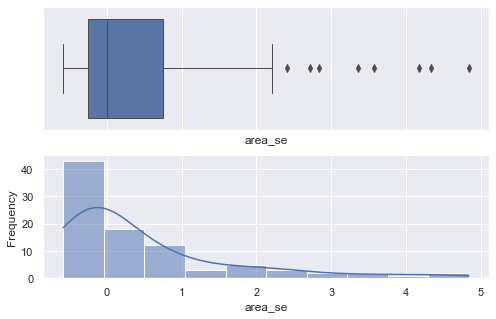

<Figure size 576x360 with 0 Axes>

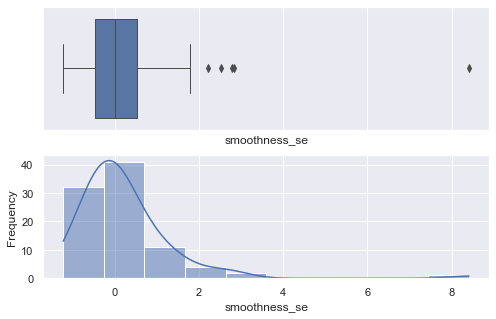

<Figure size 576x360 with 0 Axes>

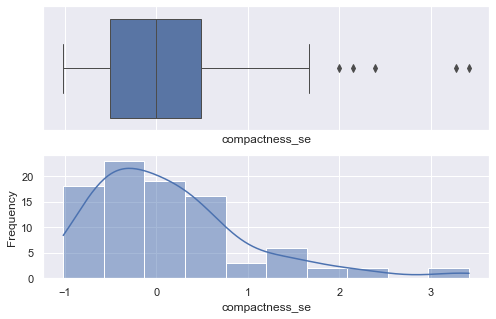

<Figure size 576x360 with 0 Axes>

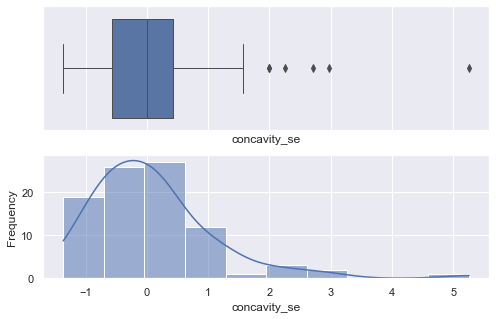

<Figure size 576x360 with 0 Axes>

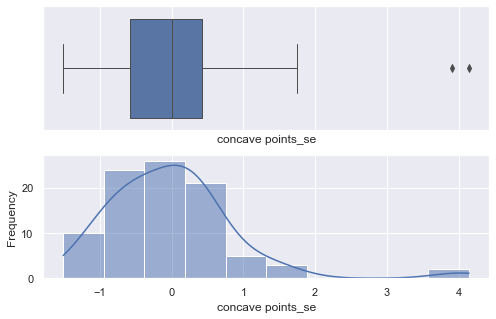

<Figure size 576x360 with 0 Axes>

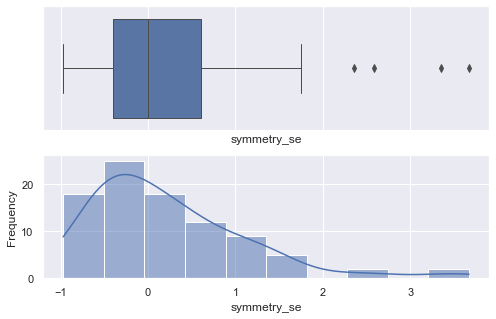

<Figure size 576x360 with 0 Axes>

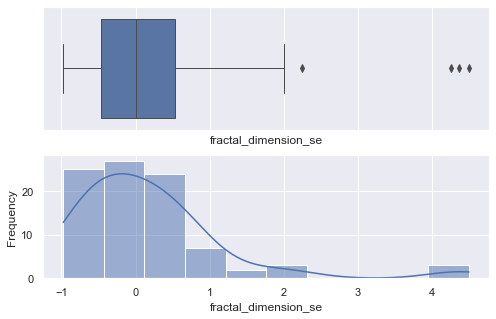

<Figure size 576x360 with 0 Axes>

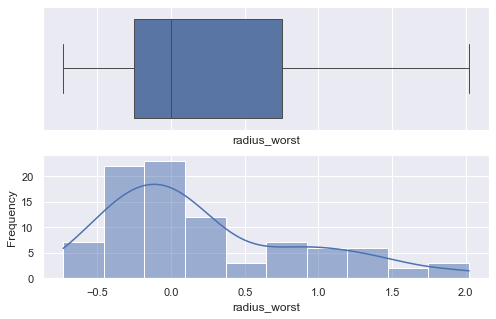

<Figure size 576x360 with 0 Axes>

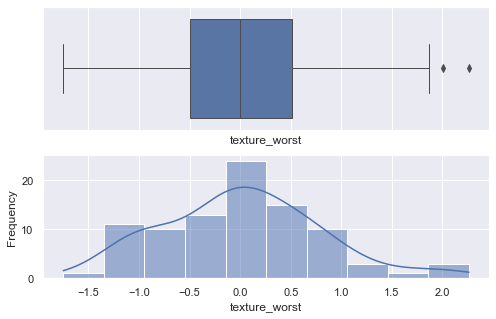

<Figure size 576x360 with 0 Axes>

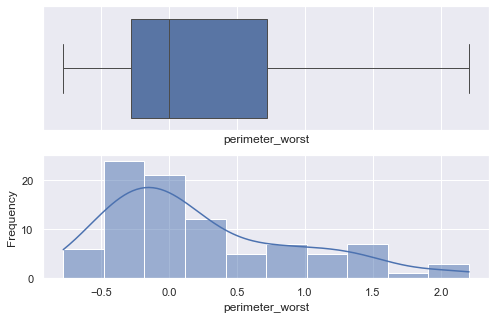

<Figure size 576x360 with 0 Axes>

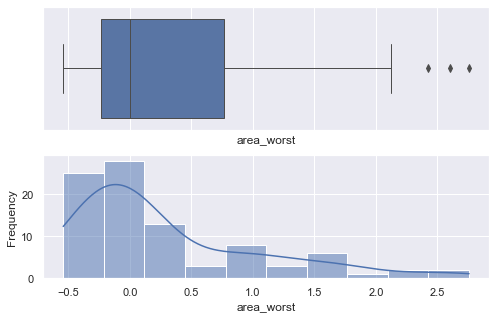

<Figure size 576x360 with 0 Axes>

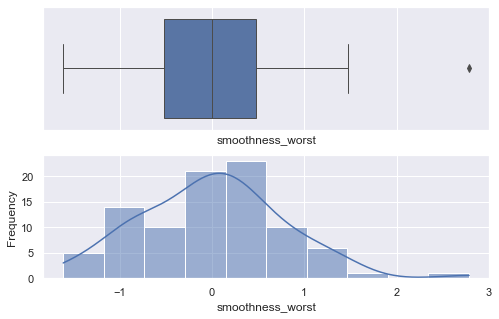

<Figure size 576x360 with 0 Axes>

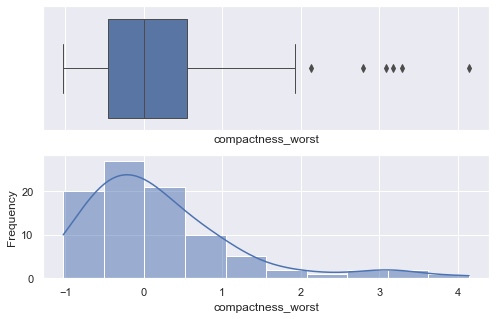

<Figure size 576x360 with 0 Axes>

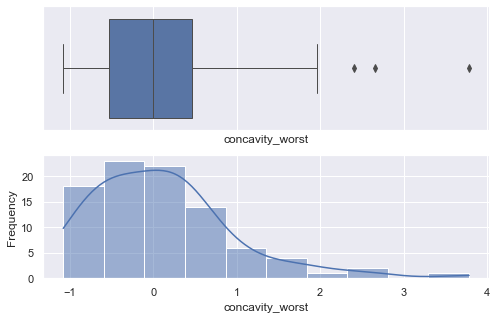

<Figure size 576x360 with 0 Axes>

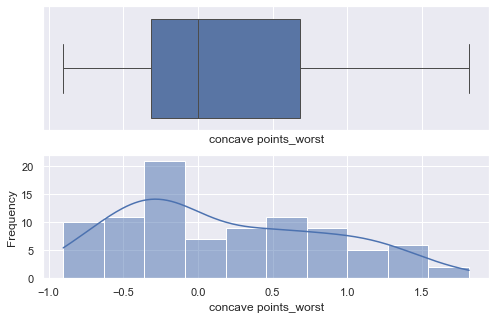

<Figure size 576x360 with 0 Axes>

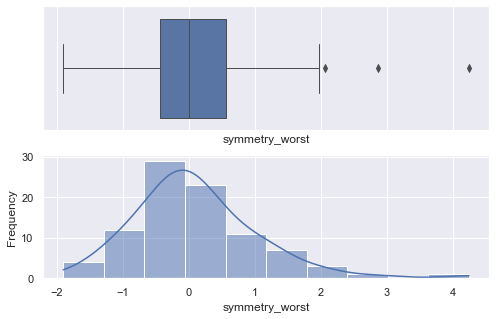

<Figure size 576x360 with 0 Axes>

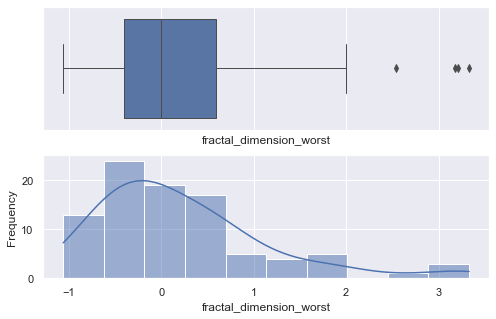

In [522]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

#### 3. Test/train

In [523]:
from sklearn.model_selection import train_test_split
X = X.drop(['diagnosis'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 4. Modelos

In [524]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

from sklearn.svm import SVC
svc = SVC(kernel='linear')

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=4, random_state=42)

#### Training the models

In [525]:
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
print("")

In [526]:
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

#### 5. Evaluación

In [527]:
from sklearn.metrics import confusion_matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

[Text(0.5, 1.0, 'Confusion matrix for LR')]

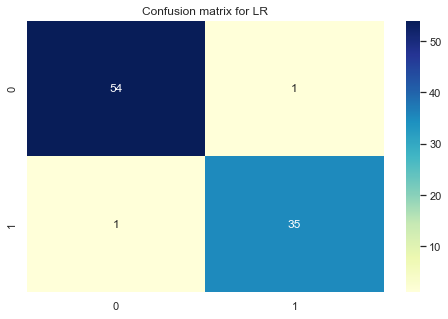

In [528]:
sns.heatmap(cf_matrix_lr,cmap="YlGnBu", annot=True).set(title='Confusion matrix for LR')

[Text(0.5, 1.0, 'Confusion matrix for SVC')]

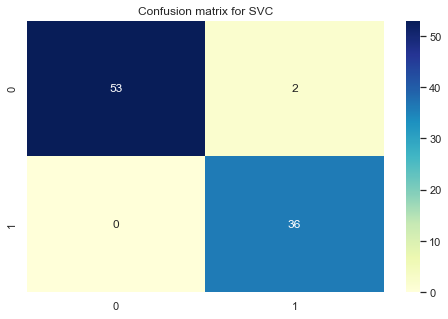

In [529]:
sns.heatmap(cf_matrix_svc, cmap="YlGnBu",annot=True).set(title='Confusion matrix for SVC')

[Text(0.5, 1.0, 'Confusion matrix for RF')]

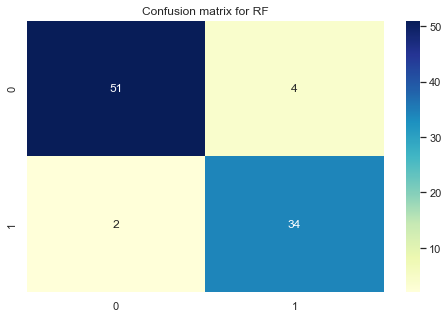

In [530]:
sns.heatmap(cf_matrix_rf,cmap="YlGnBu", annot=True).set(title='Confusion matrix for RF')

In [531]:
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print("F1 for LR: {:.4f}, SVC: {:.4f}, RF: {:.4f}".format(f1_lr, f1_svc, f1_rf) )

F1 for LR: 0.9770, SVC: 0.9772, RF: 0.9317


#### Cross Validation

In [532]:
# Cross Validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr, X, y, cv=5, scoring='f1_macro'))

cv_lr = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
print("F1 for LR mean: {:.4f}, std: {:.4f}".format(cv_lr.mean(), cv_lr.std()) )

cv_svc = cross_val_score(svc, X, y, cv=5, scoring='f1_macro')
print("F1 for SVC mean: {:.4f}, std: {:.4f}".format(cv_svc.mean(), cv_svc.std()) )

cv_rf = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print("F1 for RF mean: {:.4f}, std: {:.4f}".format(cv_rf.mean(), cv_rf.std()) )

[0.95245559 0.9762278  0.9762278  0.97652219 0.96456846]
F1 for LR mean: 0.9692, std: 0.0095
F1 for SVC mean: 0.9621, std: 0.0138
F1 for RF mean: 0.9476, std: 0.0277


* El modelo que presenta una F1 más elevada y menor desviación estándar en la validación cruzada es LR

#### 6. Mejores Parámetros

In [533]:
from sklearn.model_selection import RandomizedSearchCV

params = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "penalty": ["l1", "l2", "elasticnet"]}
rsearch = RandomizedSearchCV(estimator=lr,
                             param_distributions=params,cv=5,
                             n_iter=14,random_state=42,scoring='f1_macro')
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.9792029913876821
{'solver': 'sag', 'penalty': 'l2'}


[Text(0.5, 1.0, 'Confusion matrix for LR')]

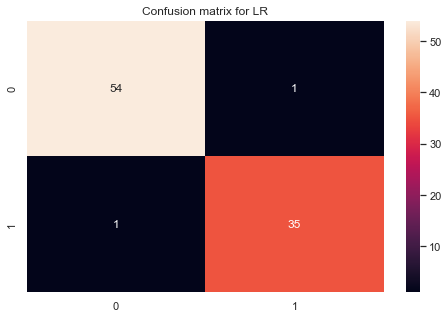

In [534]:
y_pred_RS_ls = rsearch.predict(X_test)
cf_matrix_RS_lr = confusion_matrix(y_test, y_pred_RS_ls)
sns.heatmap(cf_matrix_RS_lr, annot=True).set(title='Confusion matrix for LR')

#### 7. Predicciones sobre el Modelo Final

In [535]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 173 to 331
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              91 non-null     float64
 1   texture_mean             91 non-null     float64
 2   perimeter_mean           91 non-null     float64
 3   area_mean                91 non-null     float64
 4   smoothness_mean          91 non-null     float64
 5   compactness_mean         91 non-null     float64
 6   concavity_mean           91 non-null     float64
 7   concave points_mean      91 non-null     float64
 8   symmetry_mean            91 non-null     float64
 9   fractal_dimension_mean   91 non-null     float64
 10  radius_se                91 non-null     float64
 11  texture_se               91 non-null     float64
 12  perimeter_se             91 non-null     float64
 13  area_se                  91 non-null     float64
 14  smoothness_se            

In [536]:
final_predictions = rsearch.predict(df_test)
final_predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [537]:
# save results 
final_predictions_df = pd.DataFrame({'final_status': final_predictions})
final_predictions_df.head()

,final_status
0,1
1,0
2,1
3,0
4,0


In [538]:
# save to csv file 
final_predictions_df.to_csv('predictions.csv', index = False )

#### 8. Conclusions


* We have chosen LogisticRegression for our predictions because of its good results compared to the other models evaluated.

* We have found that LogisticRegression has been a very stable model and when performing CrossValidation it has given us very consistent results, so we believe that it is a robust model.

* On the other hand, it has been difficult to improve significantly the initial results of the model. It seems that the default parameters worked well with our data.